In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
from pandas.plotting import scatter_matrix
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [2]:
#importing the regression models
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn

In [149]:
from lightgbm import plot_importance, LGBMRegressor

In [150]:
lgbm_reg = LGBMRegressor()

In [151]:
lgbm_reg.fit(X_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.1, max_depth=-1,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

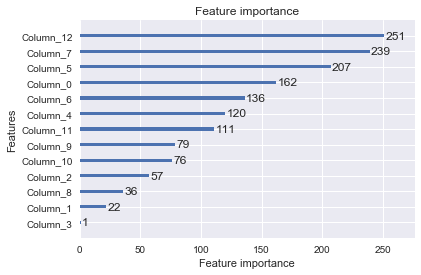

In [152]:
plot_importance(lgbm_reg)

In [165]:
sorted(list(zip(df.columns, lgbm_reg.feature_importances_)))

[('AGE', 136),
 ('B', 111),
 ('CHAS', 1),
 ('CRIM', 162),
 ('DIS', 239),
 ('INDUS', 57),
 ('LSTAT', 251),
 ('NOX', 120),
 ('PTRATIO', 76),
 ('RAD', 36),
 ('RM', 207),
 ('TAX', 79),
 ('ZN', 22)]

In [154]:
print(r2_score(y_test, lgbm_pred), (mean_squared_error(y_test, lgbm_pred)), np.mean(abs((y_test - lgbm_pred)/y_test))*100)

0.8679176894429774 10.792484697259496 10.389159834828323


In [ ]:
dataset = load_boston()

In [4]:
df = pd.concat([pd.DataFrame(data=dataset.data, columns=dataset.feature_names),
                pd.Series(data=dataset.target, name='Target')], axis=1)

In [61]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target,CRIM_Status
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,Peaceful
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,Peaceful
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,Peaceful
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,Peaceful
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,Peaceful


In [122]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


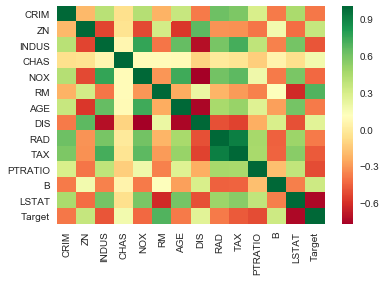

In [146]:
sns.heatmap(df.corr(), cmap='RdYlGn')

In [115]:
sns.set()

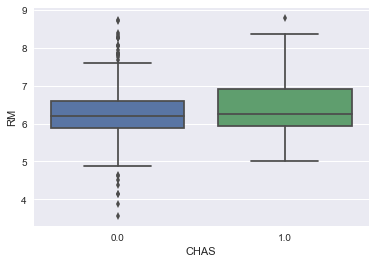

In [116]:
sns.boxplot(x=df['CHAS'], y=df['RM'])

In [13]:
X, y  = df.drop('Target', axis=1).values, df.Target.values

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=12)

In [106]:
gbm_reg = GradientBoostingRegressor(n_estimators=300)

In [107]:
gbm_reg.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=300, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [108]:
gbm_pred = gbm_reg.predict(X_test)

In [109]:
scaler = StandardScaler()

In [110]:
print(r2_score(y_test, gbm_pred), (mean_squared_error(y_test, gbm_pred)), np.mean(abs((y_test - gbm_pred)/y_test))*100)

0.8559612947368304 11.769445248269676 11.470142918183448
